<a href="https://colab.research.google.com/github/rnjsrlgns0/gungun/blob/main/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install pycaret[full]

In [1]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving train.csv to train.csv


Saving test.csv to test.csv


Saving gender_submission.csv to gender_submission.csv


In [184]:
type('동해물과백두산이') == str

True

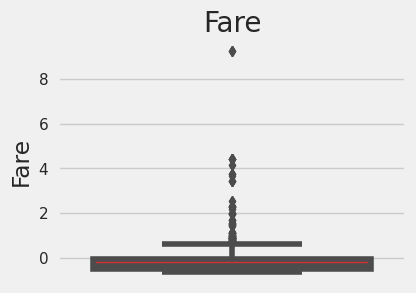

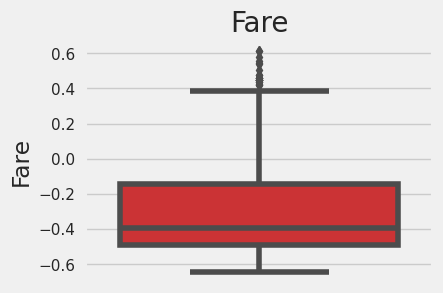

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pycaret.classification import *
from pycaret.datasets import get_data
from pycaret.classification import load_model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 이상치 확인을 위한 boxplot 그래프 함수 
def plot_box(df, cols):
    for col in cols:
        plt.figure(figsize=(4, 3))
        sns.boxplot(y=df[col])
        plt.title(col)
        plt.show()

# 이상치 제거 함수
def remove_outlier(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        low  = q1 - (1.5 * iqr)
        # high = q3 
        high = q3 + (iqr*1.5)
        df = df[(df[col] >= low) & (df[col] <= high)]
    
    return df

df = pd.concat([train,test],axis = 0)
# df['Age'] = df['Age'].mask(df['Age']<=15,1).mask((df['Age']>15)&(df['Age']<=30),2).mask((df['Age']>30)&(df['Age']<=45),3).mask((df['Age']>45)&(df['Age']<=60),4).mask((df['Age']>60),5).astype(int)
df['Fare'] = scaler.fit_transform(df[['Fare']])
# df['SibSp'] = scaler.fit_transform(df[['SibSp']])
# df['Parch'] = scaler.fit_transform(df[['Parch']])

df_train = df.iloc[:len(train),:]
df_test = df.iloc[len(train):,:]

for i in range(len(df_train)):
    if df_train['Age'][i] % 1 != 0:
        Pclass = train['Pclass'][i]
        df_train.loc[i, 'Age'] = df_train.loc[df_train['Pclass'] == Pclass]['Age'].mean()
for i in range(len(df_test)):
    if df_test['Age'][i] % 1 != 0:
        Pclass = test['Pclass'][i]
        df_test.loc[i, 'Age'] = df_test.loc[df_test['Pclass'] == Pclass]['Age'].mean()

# li_o = ['Sex','Embarked','Pclass']
li_o = ['Sex','Pclass']

df_train = df_train.drop(['Name','Cabin','Ticket','Embarked','Parch','SibSp'], axis = 1)
df_test = df_test.drop(['Name','Cabin','Ticket','Embarked','Parch','SibSp'], axis = 1)
# df_train = df_train[['Sex','Fare','Survived','Pclass','Age']]
# df_test = df_test[['Sex','Fare','Pclass','Age']]

for col in li_o:
    edcoded = pd.get_dummies(df_train[col], prefix = col).astype('int')
    df_train = pd.concat([df_train, edcoded], axis = 1)
    df_train = df_train.drop(col, axis = 1)
    edcoded = pd.get_dummies(df_test[col], prefix = col).astype('int')
    df_test = pd.concat([df_test, edcoded], axis = 1)
    df_test = df_test.drop(col, axis = 1)

df_train = df_train.drop('PassengerId', axis = 1)
df_test = df_test.drop('PassengerId', axis = 1)

# 이상치가 있는 변수 확인
cols = ['Fare']
cols = ['Fare']
plot_box(df_train, cols)

# 이상치 제거 후 결과 확인
df_train = remove_outlier(df_train, cols)
plot_box(df_train, cols)


In [227]:
df_train


,Survived,Age,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.000000,-0.503402,0,1,0,0,1
2,1.0,26.000000,-0.490356,1,0,0,0,1
3,1.0,35.000000,0.382778,1,0,1,0,0
4,0.0,35.000000,-0.487940,0,1,0,0,1
5,0.0,25.140620,-0.480049,0,1,0,0,1
...,...,...,...,...,...,...,...,...
886,0.0,27.000000,-0.392267,0,1,0,1,0
887,1.0,19.000000,-0.063694,1,0,1,0,0
888,0.0,24.954899,-0.190292,1,0,0,0,1
889,1.0,26.000000,-0.063694,0,1,1,0,0


In [228]:
df_train = setup(data = df_train.drop(['Survived'], axis = 1), target = df_train['Survived'])

,Description,Value
0,Session id,2195
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(775, 8)"
4,Transformed data shape,"(775, 8)"
5,Transformed train set shape,"(542, 8)"
6,Transformed test set shape,"(233, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


Shape of your Data Set loaded: (775, 8)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nullpercent,NuniquePercent,dtype,Nuniques,Nulls,Least num. of categories,Data cleaning improvement suggestions
Age,0.000000,12.516129,float32,97,0,0,
Fare,0.000000,26.193548,float32,203,0,0,right skewed distribution: cap or drop outliers
Sex_female,0.000000,0.258065,float32,2,0,0,
Sex_male,0.000000,0.258065,float32,2,0,0,
Pclass_1,0.000000,0.258065,float32,2,0,0,right skewed distribution: cap or drop outliers
Pclass_2,0.000000,0.258065,float32,2,0,0,right skewed distribution: cap or drop outliers
Pclass_3,0.000000,0.258065,float32,2,0,0,


    7 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification problem #####################


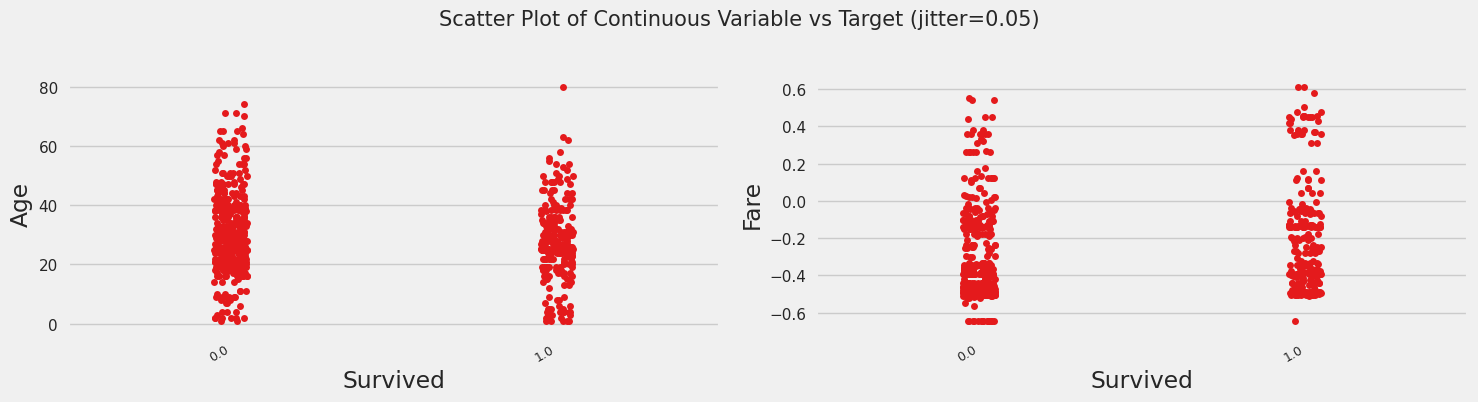

Total Number of Scatter Plots = 3


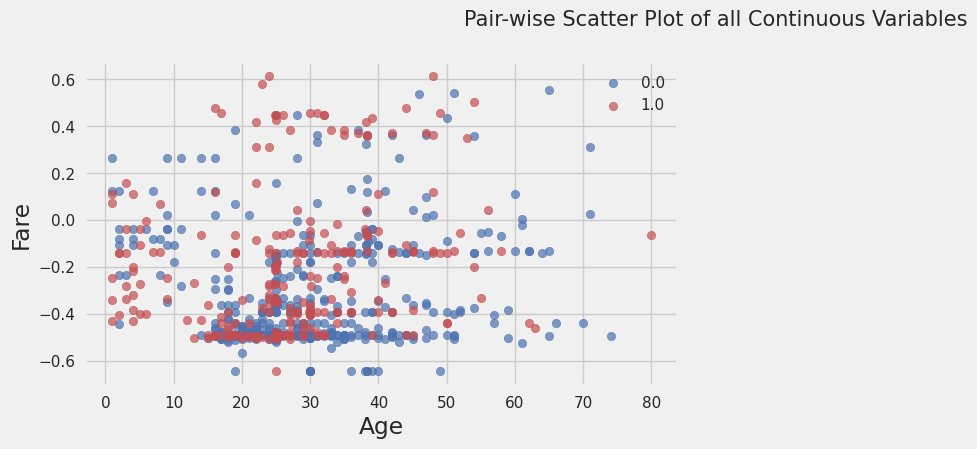

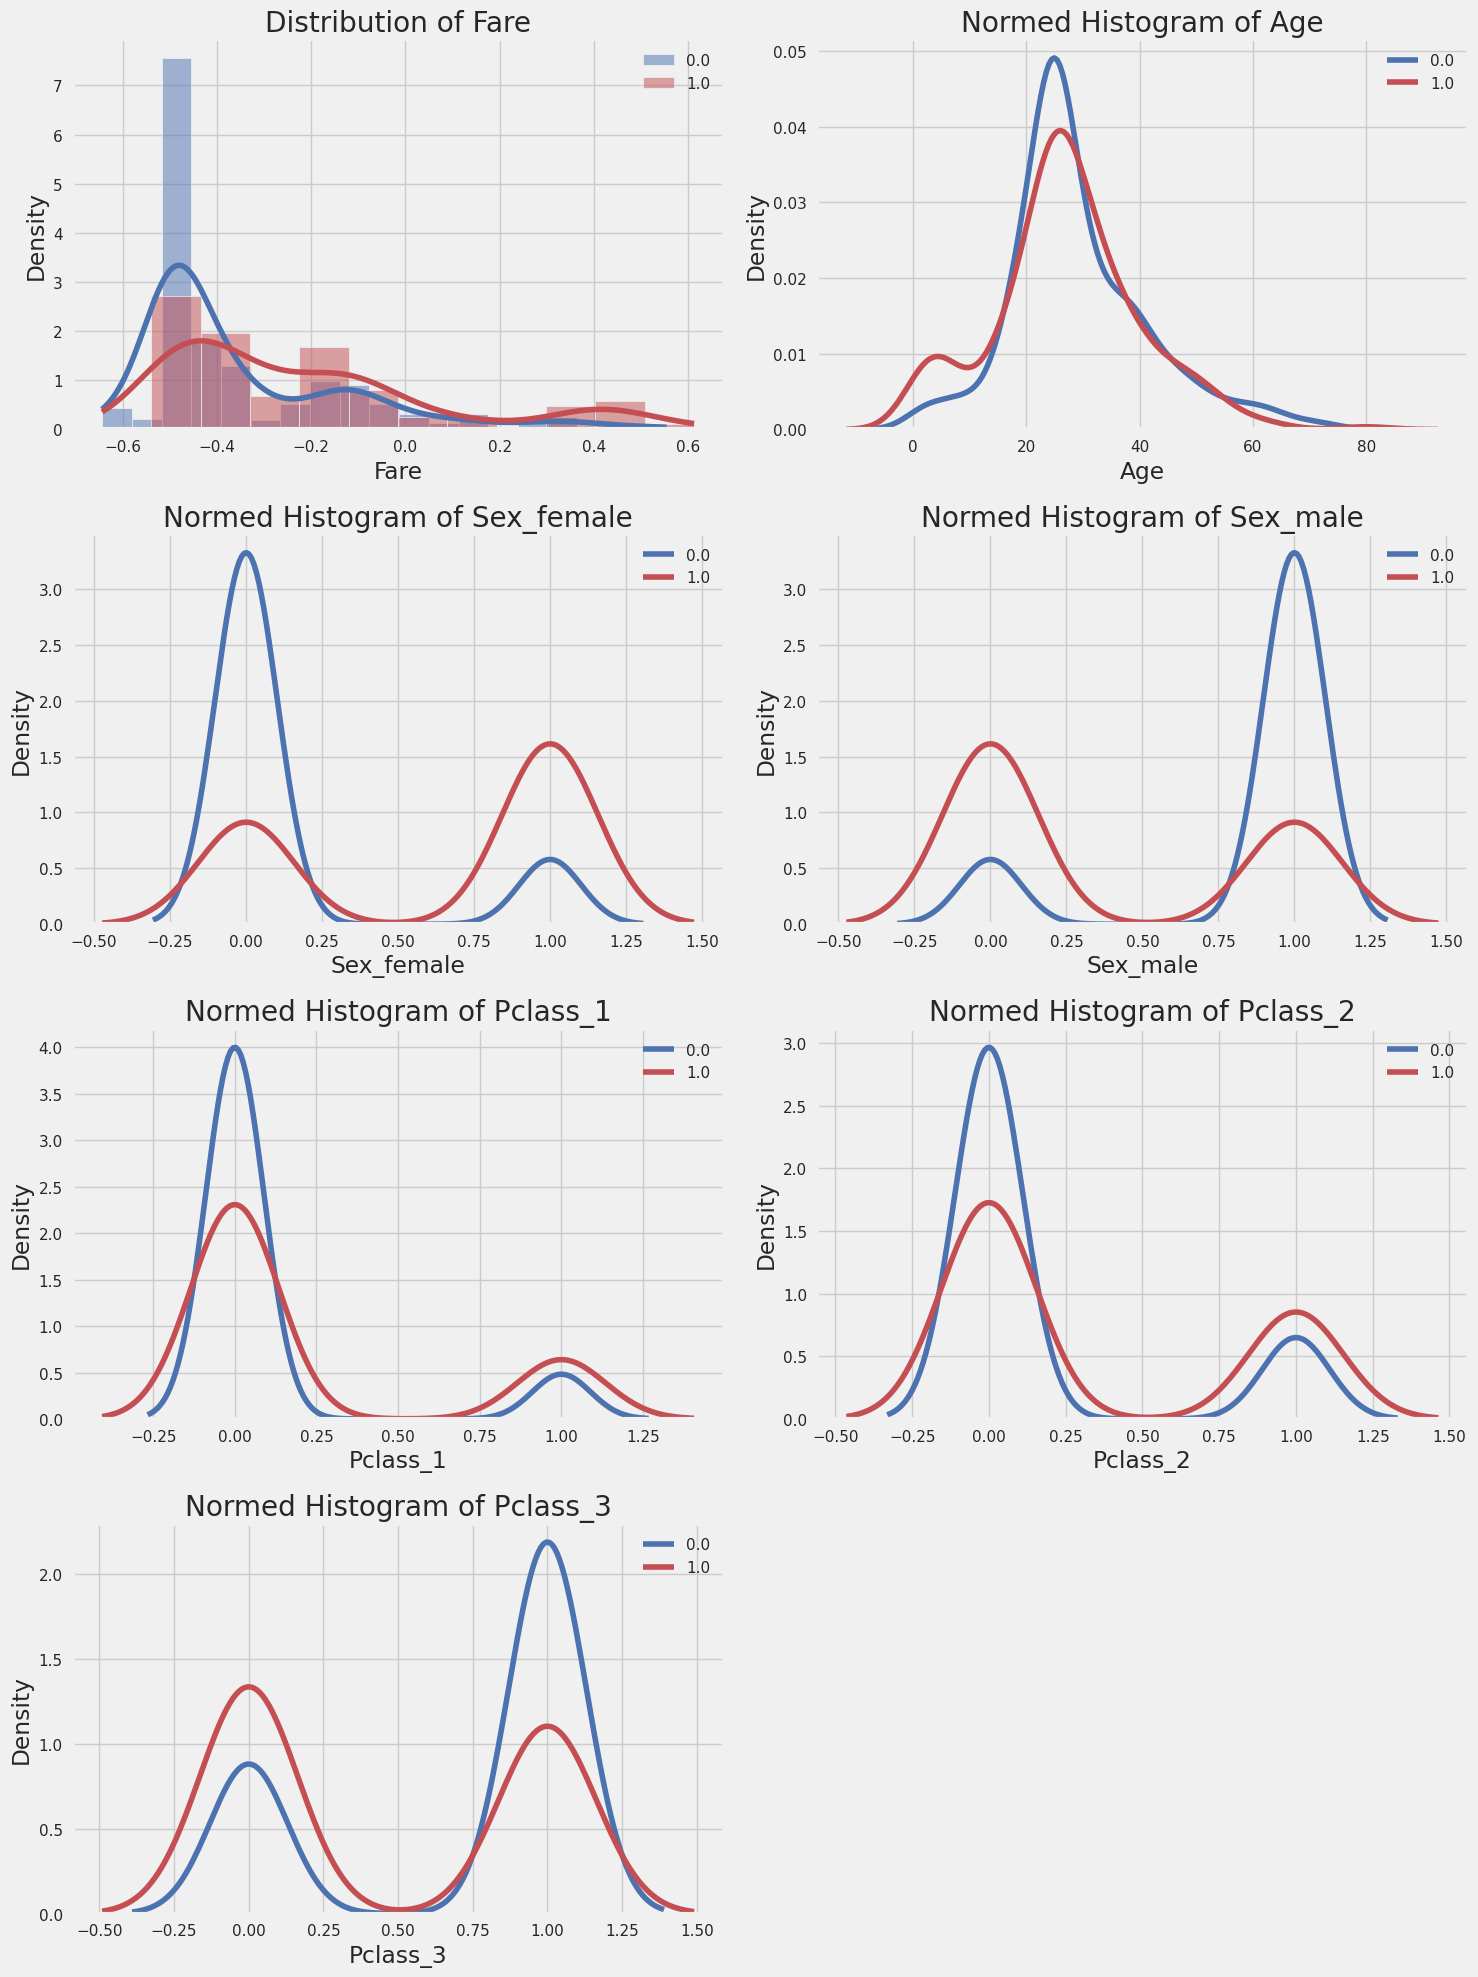

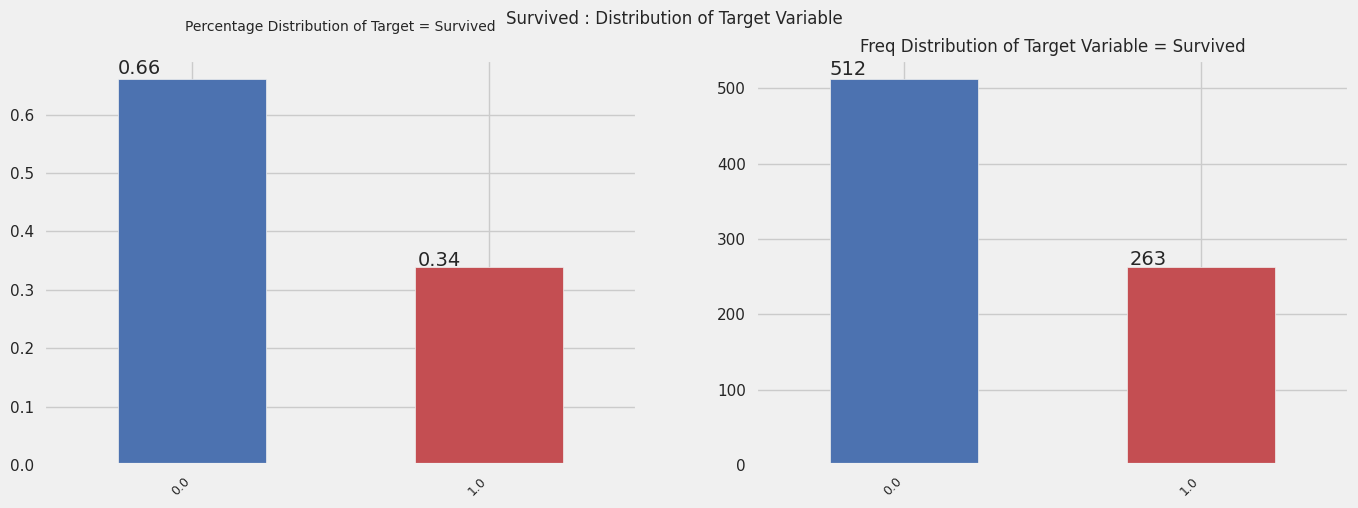

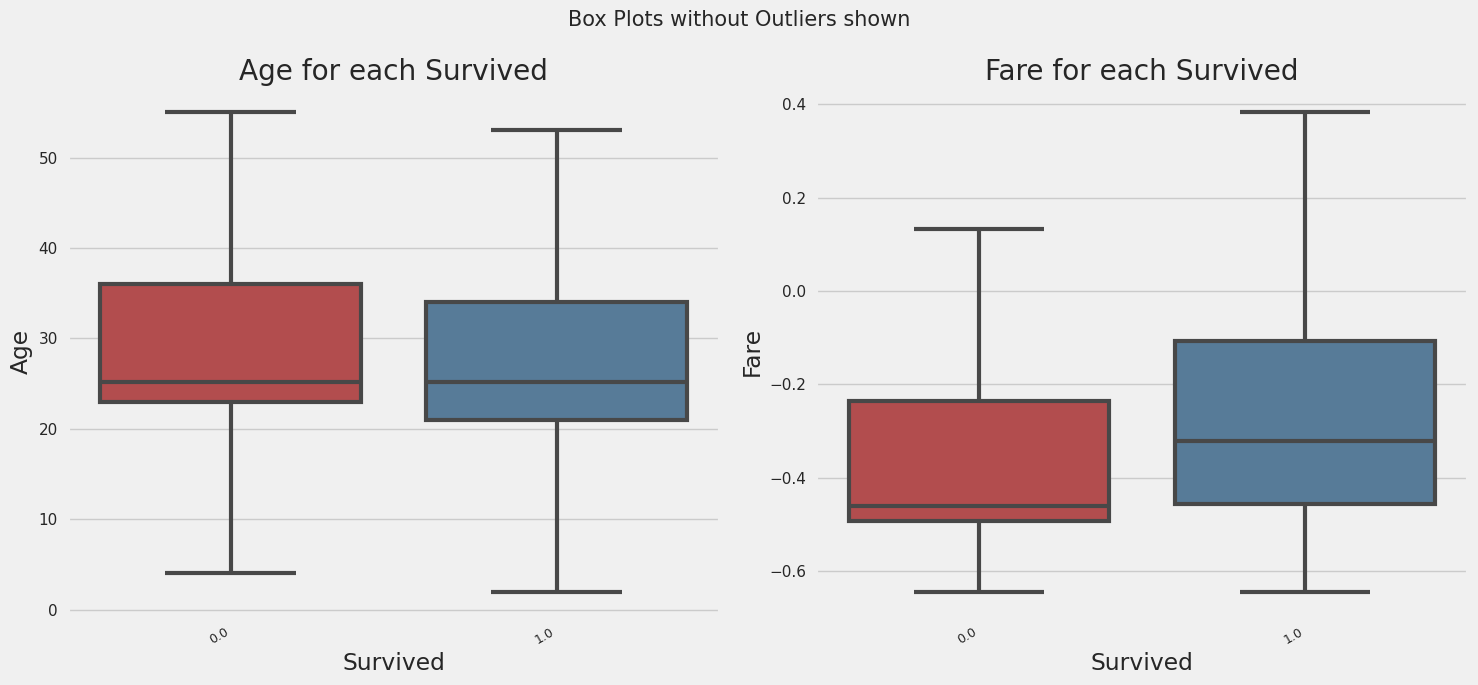

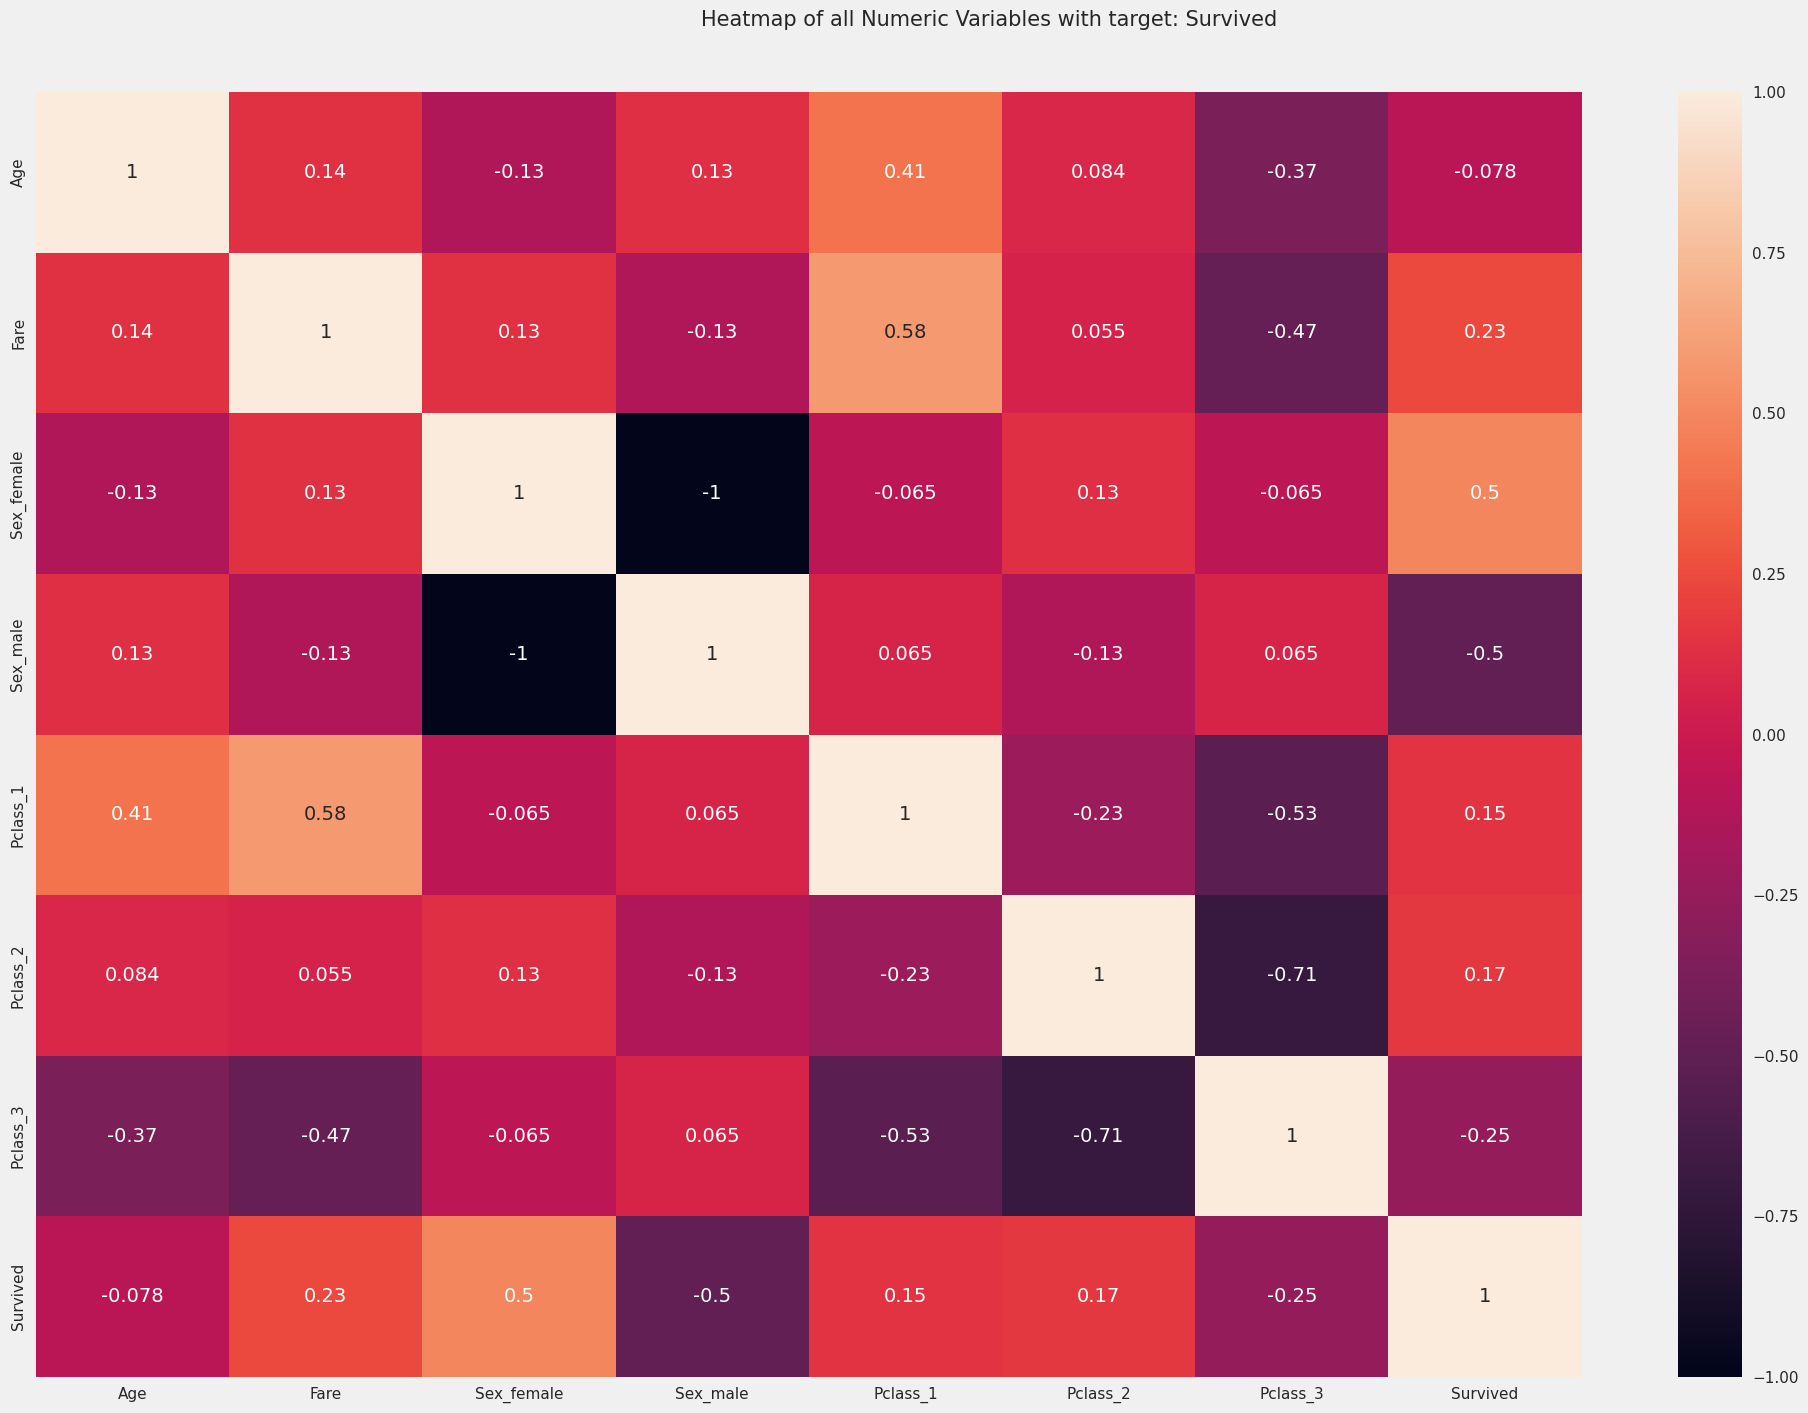

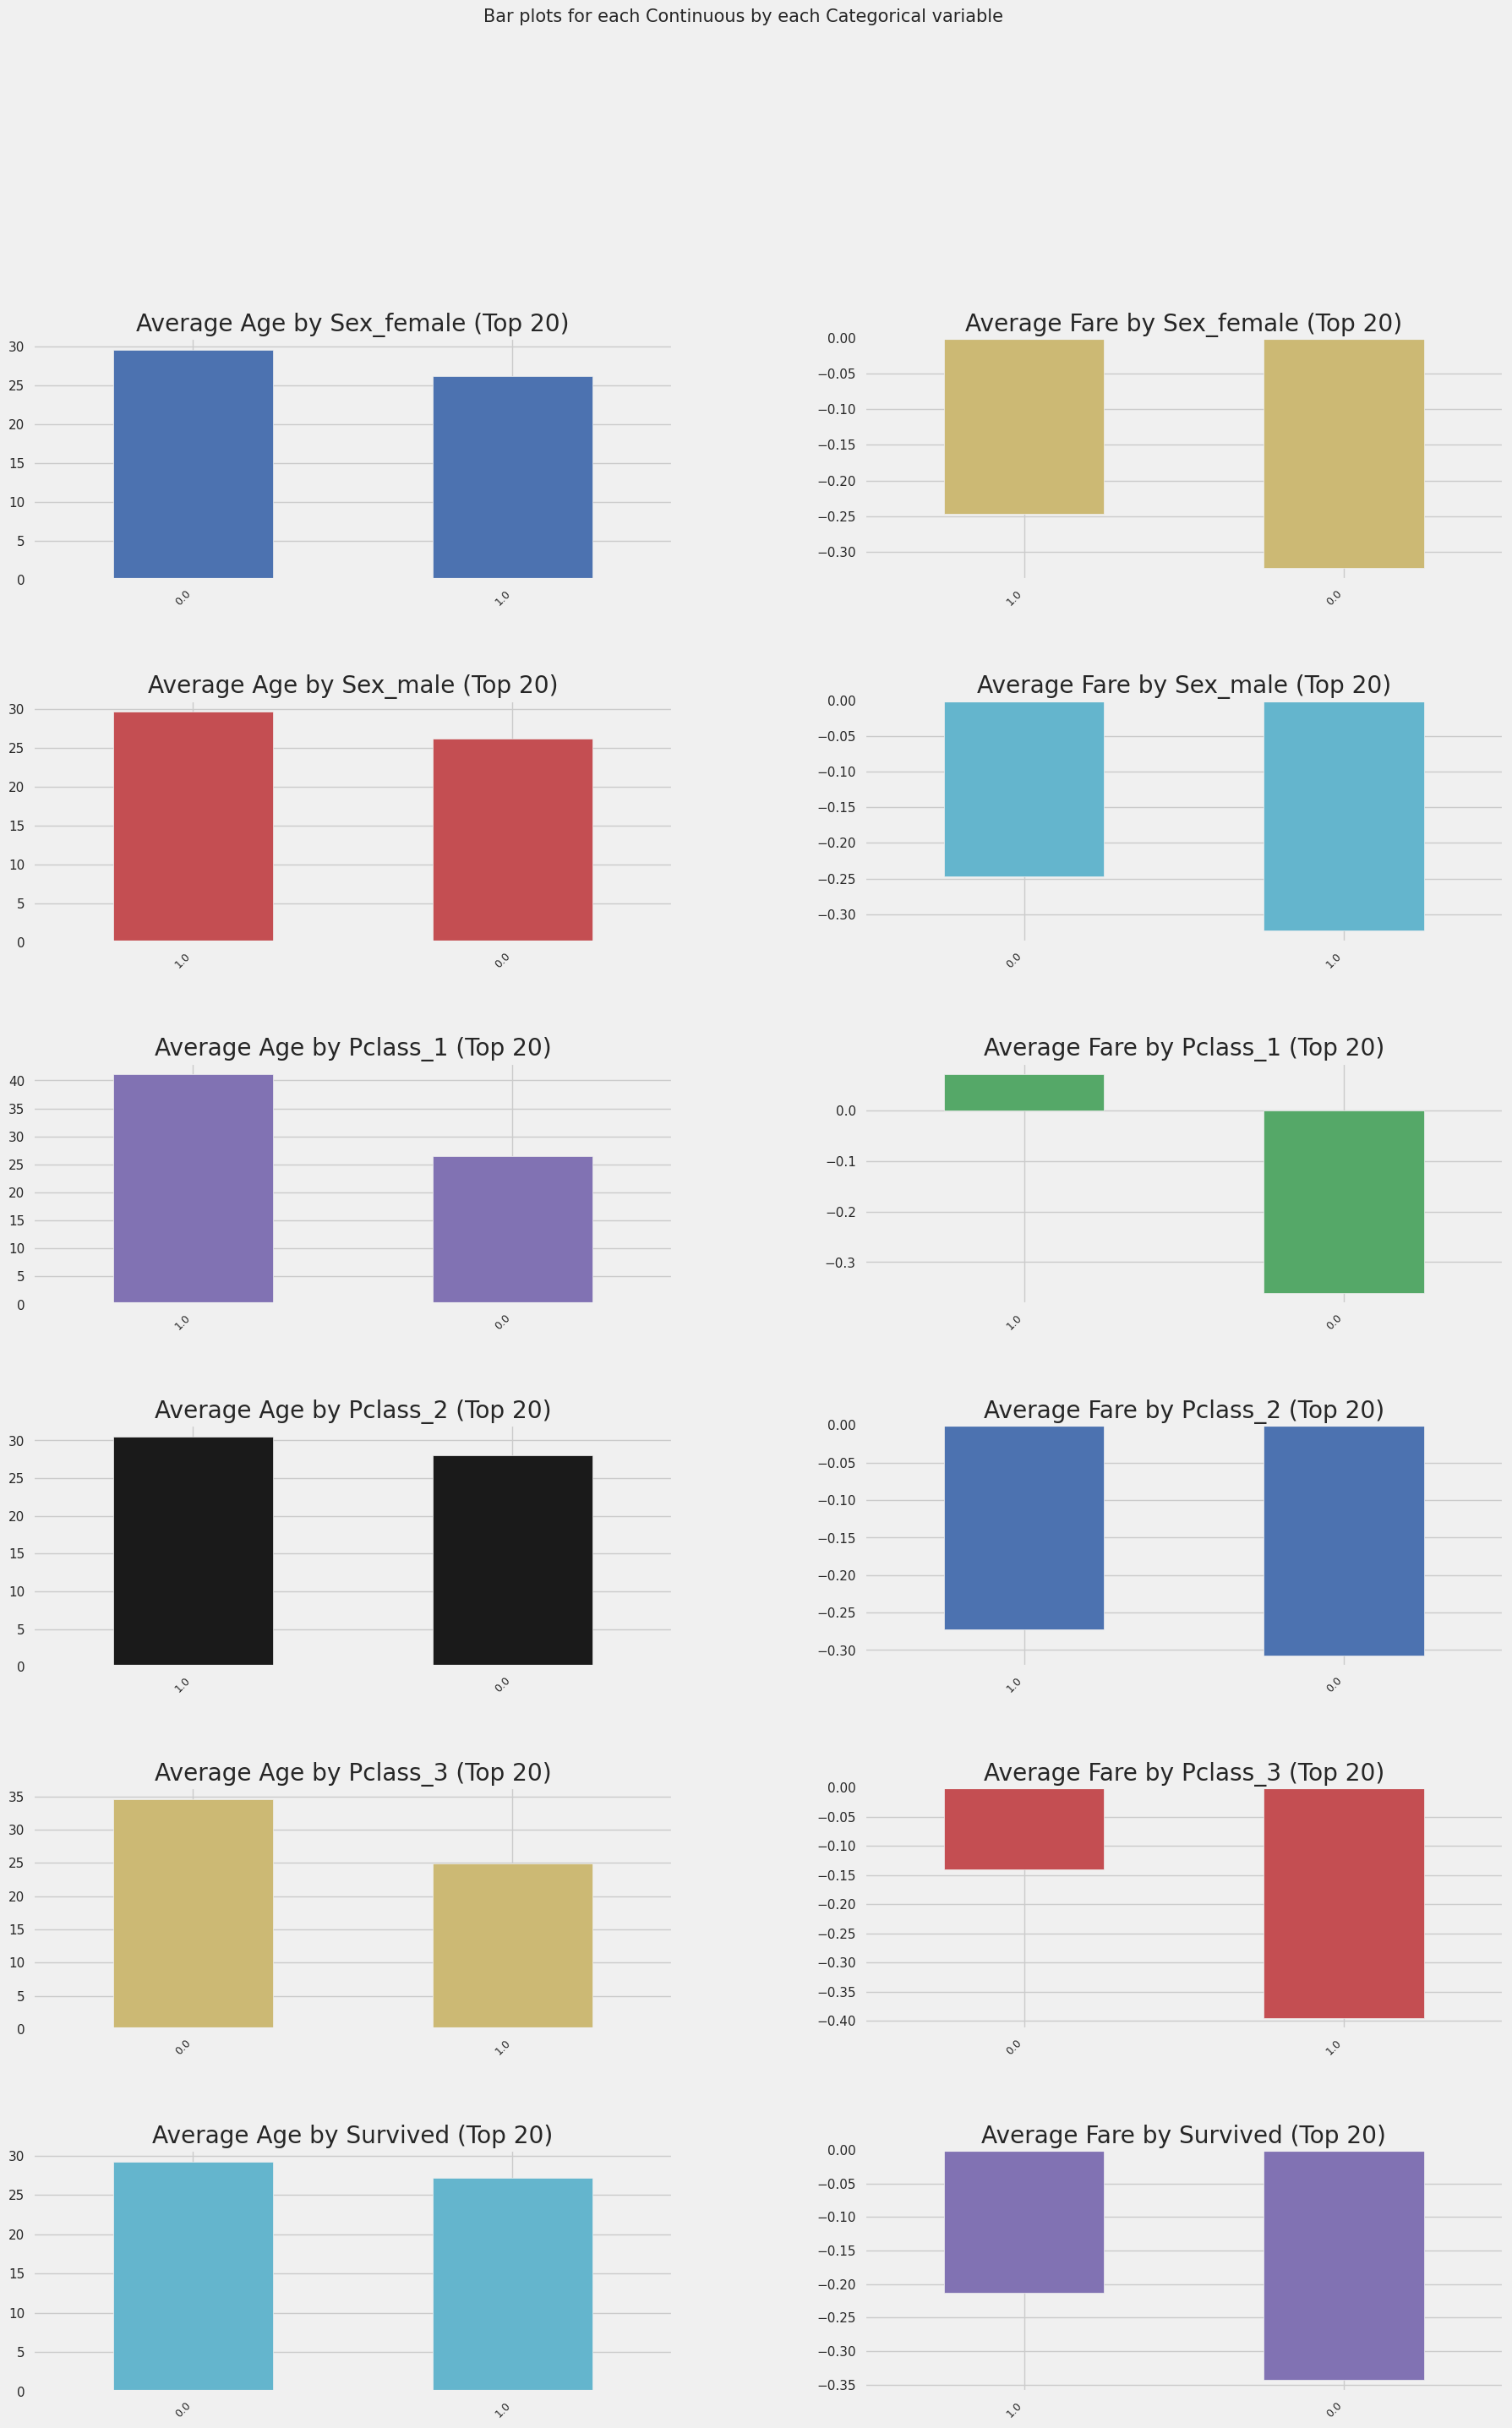

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [229]:
#EDA 방식에는 bokeh, svg가 있음
eda(display_format = 'svd')

In [230]:
best_models = compare_models(n_select=3, sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8320,0.8349,0.6883,0.7975,0.7326,0.6117,0.6199,0.7100
catboost,CatBoost Classifier,0.8320,0.8260,0.6667,0.8130,0.7261,0.6074,0.6179,1.6630
ada,Ada Boost Classifier,0.8136,0.8198,0.6684,0.7657,0.7072,0.5725,0.5801,0.6480
rf,Random Forest Classifier,0.8081,0.8140,0.6611,0.7420,0.6960,0.5572,0.5612,0.8630
lightgbm,Light Gradient Boosting Machine,0.8044,0.8199,0.6673,0.7326,0.6955,0.5523,0.5560,0.3280
lr,Logistic Regression,0.8025,0.8244,0.6629,0.7425,0.6965,0.5512,0.5563,0.3650
ridge,Ridge Classifier,0.8007,0.0000,0.6684,0.7344,0.6959,0.5486,0.5531,0.4360
lda,Linear Discriminant Analysis,0.7952,0.8235,0.6684,0.7187,0.6893,0.5373,0.5407,0.2960
nb,Naive Bayes,0.7841,0.8252,0.6956,0.6868,0.6872,0.5231,0.5267,0.3990
xgboost,Extreme Gradient Boosting,0.7804,0.7974,0.6398,0.6959,0.6612,0.5000,0.5052,0.5610


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

In [231]:
df_test = df_test.fillna(df_test['Fare'].mean())

blend_best = blend_models(estimator_list=best_models, optimize='Accuracy')
df_test = df_test.drop('Survived',axis=1)
pred = blend_best.predict(df_test)
sub = pd.read_csv('gender_submission.csv')
accuracy_score(pred, sub['Survived'])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8545,0.8962,0.6842,0.8667,0.7647,0.6615,0.6712
1,0.8182,0.8406,0.6842,0.7647,0.7222,0.5877,0.5897
2,0.8333,0.8426,0.7222,0.7647,0.7429,0.6197,0.6203
3,0.7963,0.7346,0.4444,0.8889,0.5926,0.4762,0.5270
4,0.7778,0.8164,0.6667,0.6667,0.6667,0.5000,0.5000
5,0.7778,0.8148,0.6667,0.6667,0.6667,0.5000,0.5000
6,0.7963,0.8812,0.5556,0.7692,0.6452,0.5075,0.5207
7,0.8333,0.7948,0.6667,0.8000,0.7273,0.6087,0.6139
8,0.8704,0.8707,0.8421,0.8000,0.8205,0.7192,0.7197


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

0.9019138755980861

In [232]:
pred = pd.DataFrame({'Survived':pred})
hun = pd.concat([test['PassengerId'],pred],axis = 1)
hun['Survived'] = hun['Survived'].astype('int')
hun.to_csv('titanic_hun.csv', index = False)
pd.read_csv('titanic_hun.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [233]:
from sklearn.metrics import accuracy_score
from pycaret.classification import stack_models

# 앞에서 선택한 3개의 최상위 모델을 사용하여 스태킹 앙상블 모델 생성
stacked_model = stack_models(estimator_list=best_models, optimize='Accuracy')

df_test = df_test.fillna(df_test['Fare'].mean())

pred = stacked_model.predict(df_test)

sub = pd.read_csv('gender_submission.csv')
accuracy_score(pred, sub['Survived'])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8727,0.9050,0.6842,0.9286,0.7879,0.6999,0.7166
1,0.8182,0.8392,0.6842,0.7647,0.7222,0.5877,0.5897
2,0.8333,0.8611,0.7222,0.7647,0.7429,0.6197,0.6203
3,0.8148,0.7130,0.5556,0.8333,0.6667,0.5455,0.5669
4,0.7963,0.8025,0.6667,0.7059,0.6857,0.5352,0.5357
5,0.7407,0.8086,0.6667,0.6000,0.6316,0.4324,0.4339
6,0.7963,0.8580,0.5556,0.7692,0.6452,0.5075,0.5207
7,0.8704,0.8565,0.7222,0.8667,0.7879,0.6957,0.7016
8,0.7963,0.8301,0.7368,0.7000,0.7179,0.5587,0.5591


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

0.9210526315789473

In [58]:
pred = pd.DataFrame({'Survived':pred})
hun = pd.concat([test['PassengerId'],pred],axis = 1)
hun['Survived'] = hun['Survived'].astype('int')
hun.to_csv('titanic_hun.csv', index = False)
pd.read_csv('titanic_hun.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
